In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['Species'].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2 }, inplace= True)

In [10]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [12]:
df.drop(columns=['Id'],axis=1,inplace=True)

In [14]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

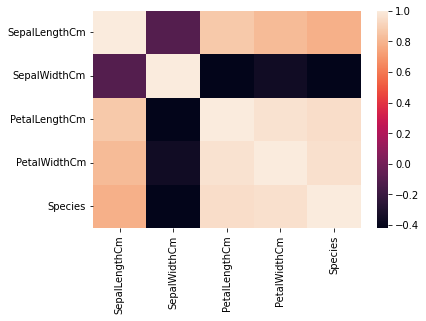

In [19]:
sns.heatmap(df.corr())

In [23]:
X = df.drop(columns =['Species'])
y = df['Species']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 35,stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression 

In [28]:
%%time
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)
model

Wall time: 339 ms


LogisticRegression()

In [29]:
y_pred_logreg = model.predict(X_test)
y_pred_logreg[0:10]

array([2, 0, 2, 2, 2, 1, 1, 1, 2, 0], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

In [31]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [32]:
confusion_matrix(y_test,y_pred_logreg)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  8]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred_logreg)

0.9

# DT

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
tree_clf = DecisionTreeClassifier()

In [36]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred_tree_clf = tree_clf.predict(X_test)

In [39]:
y_pred_tree_clf

array([2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred_tree_clf)

0.9

In [40]:
accuracy_score(y_test,y_pred_tree_clf)

0.9

In [41]:
import pickle 

In [42]:
model = pickle.dump(logreg,open('model.pkl','wb'))